<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Praca_domowa_2_Jakub_Kownacki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

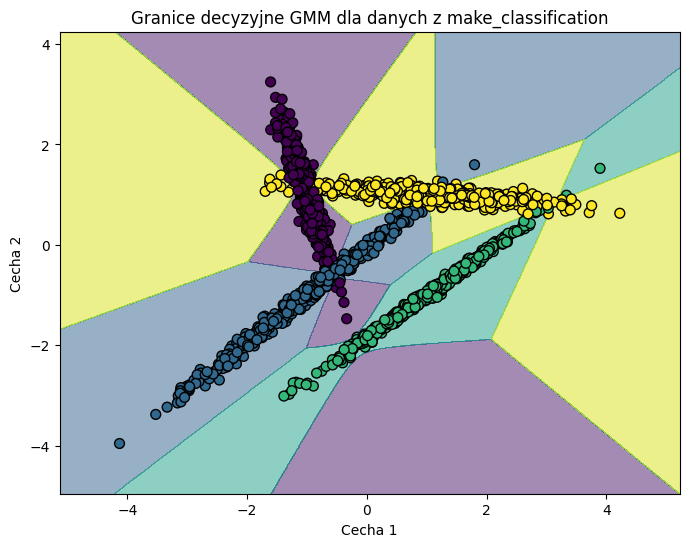

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

# Generowanie danych 2D z 3 klasami
X, y_true = make_classification(
    n_samples=2000,          # liczba próbek
    n_features=2,           # 2 cechy (2D)
    n_informative=2,        # obie cechy są informacyjne
    n_redundant=0,          # brak cech redundantnych
    n_classes=4,            # 4 klasy
    n_clusters_per_class=1, # jeden klaster na klasę
)

# Dopasowanie modelu GMM z 4 komponentami
gmm = GaussianMixture(n_components=4).fit(X)

# Tworzenie siatki punktów do wizualizacji granic decyzyjnych
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
grid = np.c_[xx.ravel(), yy.ravel()]

# Przewidywanie klastrów dla punktów w siatce
probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)

# Wizualizacja granic decyzyjnych i danych
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), s=50, cmap='viridis', edgecolor='k')
plt.title('Granice decyzyjne GMM dla danych z make_classification')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

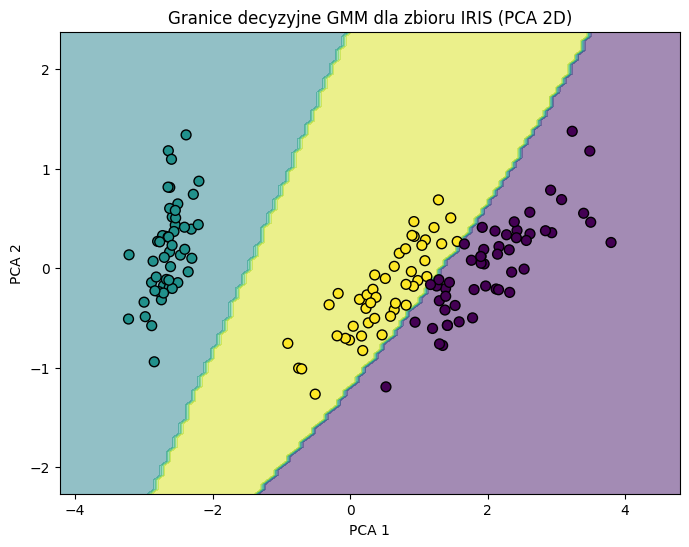

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Wczytanie zbioru danych IRIS
iris = load_iris()
X = iris.data  # 4 cechy: długość i szerokość działek i płatków
y_true = iris.target  # Etykiety klas (0, 1, 2) - nie używane w grupowaniu

# Redukcja do 2D za pomocą PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Dopasowanie modelu GMM z 3 komponentami do danych 2D
gmm = GaussianMixture(n_components=3).fit(X_2d)

# Tworzenie siatki punktów do wizualizacji granic decyzyjnych
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Przewidywanie klastrów dla punktów w siatce
probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)

# Wizualizacja granic decyzyjnych i danych
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5, cmap='viridis')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=gmm.predict(X_2d), s=50, cmap='viridis', edgecolor='k')
plt.title('Granice decyzyjne GMM dla zbioru IRIS (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

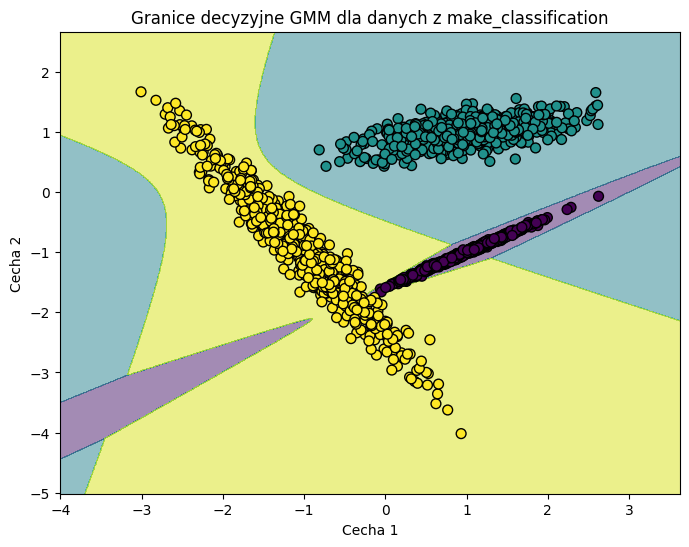

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification

# Generowanie danych 2D z 3 klasami
X, y_true = make_classification(
    n_samples=2000,          # liczba próbek
    n_features=2,           # 2 cechy (2D)
    n_informative=2,        # obie cechy są informacyjne
    n_redundant=0,          # brak cech redundantnych
    n_classes=1,            # 4 klasy
    n_clusters_per_class=3, # jeden klaster na klasę
)

# Dopasowanie modelu GMM z 4 komponentami
gmm = GaussianMixture(n_components=3).fit(X)

# Tworzenie siatki punktów do wizualizacji granic decyzyjnych
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
grid = np.c_[xx.ravel(), yy.ravel()]

# Przewidywanie klastrów dla punktów w siatce
probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)

# Wizualizacja granic decyzyjnych i danych
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), s=50, cmap='viridis', edgecolor='k')
plt.title('Granice decyzyjne GMM dla danych z make_classification')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

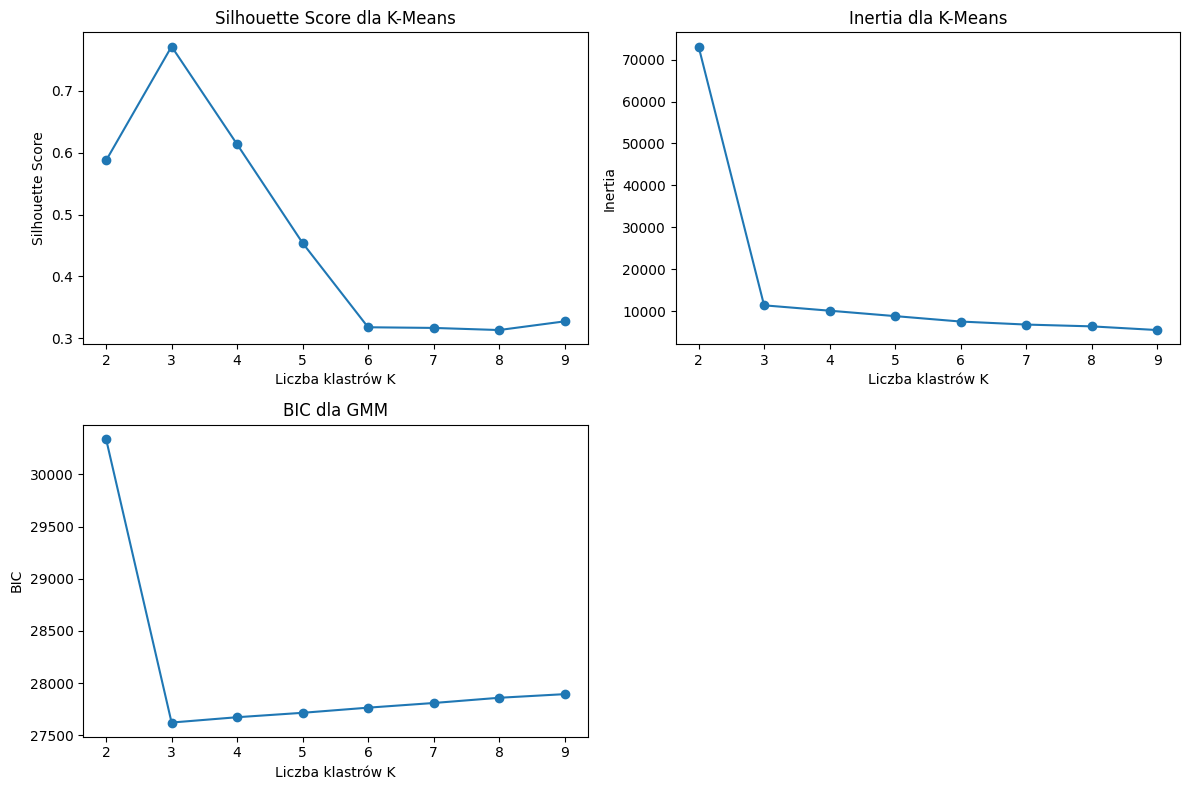

In [154]:
# Listy do przechowywania wyników
silhouette_scores = []
inertia_values = []
bic_values = []
K_range = range(2, 10)

for K in K_range:
    # Dopasowanie K-Means
    kmeans = KMeans(n_clusters=K).fit(X)
    labels_kmeans = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels_kmeans))
    inertia_values.append(kmeans.inertia_)

    # Dopasowanie GMM
    gmm = GaussianMixture(n_components=K).fit(X)
    bic_values.append(gmm.bic(X))

# Wykresy
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score dla K-Means')
plt.xlabel('Liczba klastrów K')
plt.ylabel('Silhouette Score')

plt.subplot(2, 2, 2)
plt.plot(K_range, inertia_values, marker='o')
plt.title('Inertia dla K-Means')
plt.xlabel('Liczba klastrów K')
plt.ylabel('Inertia')

plt.subplot(2, 2, 3)
plt.plot(K_range, bic_values, marker='o')
plt.title('BIC dla GMM')
plt.xlabel('Liczba klastrów K')
plt.ylabel('BIC')

plt.tight_layout()
plt.show()

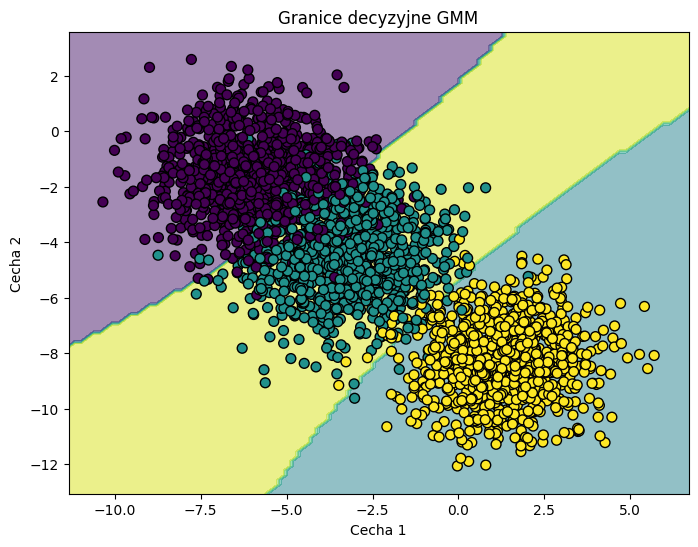

In [104]:
# Generowanie danych 2D podobnych do tych z zajęć (3 klastry)
X, y_true = make_blobs(n_samples=3000, centers=3, cluster_std=1.4)

# Dopasowanie modelu GMM z 3 komponentami
gmm = GaussianMixture(n_components=3).fit(X)

# Tworzenie siatki punktów do wizualizacji granic decyzyjnych
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Przewidywanie klastrów dla punktów w siatce
probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)

# Wizualizacja granic decyzyjnych i danych
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis', edgecolor='k')
plt.title('Granice decyzyjne GMM')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()

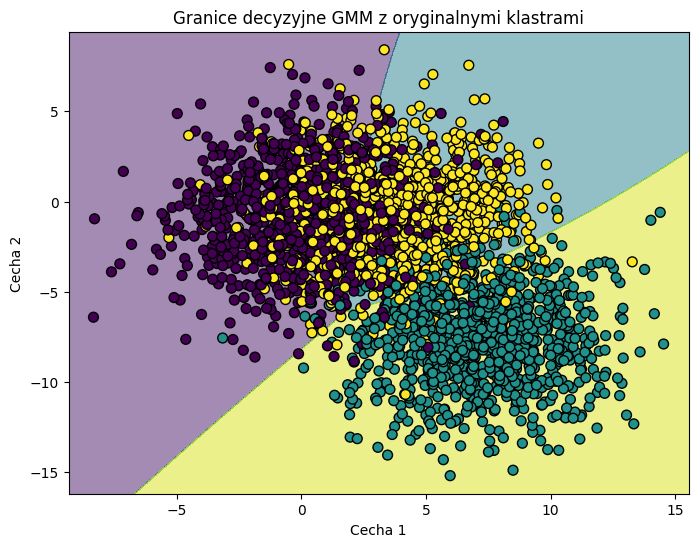

In [118]:
# Generowanie danych 2D z 3 klastrami
X, y_true = make_blobs(n_samples=3000, centers=3, cluster_std=2.60)

# Dopasowanie modelu GMM z 3 komponentami
gmm = GaussianMixture(n_components=3).fit(X)

# Tworzenie siatki punktów do wizualizacji granic decyzyjnych
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))
grid = np.c_[xx.ravel(), yy.ravel()]

# Przewidywanie klastrów dla punktów w siatce
probs = gmm.predict_proba(grid)
labels = np.argmax(probs, axis=1)

# Wizualizacja granic decyzyjnych i danych z oryginalnymi klastrami
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k')
plt.title('Granice decyzyjne GMM z oryginalnymi klastrami')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.show()